In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
# Import Required Libraries
import numpy as np
import pandas as pd
import nltk

# Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences
nltk.download('punkt') # one time execution
import re

C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\pyth

In [2]:
# Read the Data
df = pd.read_csv("tennis_articles.csv", encoding='cp1252')
df.head()

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP) — Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [3]:
text=df['article_text'][0]
text

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [4]:
import numpy as np
# Split Text into Sentences
from nltk.tokenize import sent_tokenize # Return a sentence-tokenized copy of text
sentences = []
sentences.append(sent_tokenize(text))

sentences = [y for x in sentences for y in x] # flatten list
sentences

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.",
 "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?",
 "'No, not at

In [5]:
# Text Preprocessing

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

clean_sentences

['maria sharapova has basically no friends as tennis players on the wta tour ',
 'the russian player has no problems in openly speaking about it and in a recent interview she said   i don t really hide any feelings too much ',
 'i think everyone knows this is my job here ',
 'when i m on the courts or when i m on the court playing  i m a competitor and i want to beat every single person whether they re in the locker room or across the net ',
 'so i m not the one to strike up a conversation about the weather and know that in the next few minutes i have to go and try to win a tennis match ',
 'i m a pretty competitive girl ',
 'i say my hellos  but i m not sending any players flowers as well ',
 'uhm  i m not really friendly or close to many players ',
 'i have not a lot of friends away from the courts  ',
 'when she said she is not really close to a lot of players  is that something strategic that she is doing ',
 'is it different on the men s tour than the women s tour ',
 ' no  not at

In [6]:
# Remove stop words

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

clean_sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['maria sharapova basically friends tennis players wta tour',
 'russian player problems openly speaking recent interview said really hide feelings much',
 'think everyone knows job',
 'courts court playing competitor want beat every single person whether locker room across net',
 'one strike conversation weather know next minutes go try win tennis match',
 'pretty competitive girl',
 'say hellos sending players flowers well',
 'uhm really friendly close many players',
 'lot friends away courts',
 'said really close lot players something strategic',
 'different men tour women tour',
 '',
 'think sport mean friends everyone categorized tennis player going get along tennis players',
 'think every person different interests',
 'friends completely different jobs interests met different parts life',
 'think everyone thinks tennis players greatest friends',
 'ultimately tennis small part',
 'many things interested',
 'also read maria sharapova reveals tennis keeps motivated']

In [7]:
# Selecting Vocab Size ie size of dictionary. You can take any values. I am taking 10000 to vectorize words in to whole numbers
vocab_size=10000

In [8]:
# creating the one-hot Representation of the sentence
onehot_rep=[one_hot(words,vocab_size) for words in clean_sentences]
print(onehot_rep)

[[1617, 4385, 7875, 9512, 1627, 737, 8524, 3169], [6604, 2501, 8228, 8569, 9991, 214, 6786, 8113, 3729, 1653, 395, 6654], [4583, 1941, 2420, 5357], [1329, 9537, 1660, 8592, 3553, 3761, 1282, 3698, 7769, 6826, 6079, 7062, 1022, 2828], [726, 3376, 5203, 2062, 3612, 5557, 7572, 4392, 5056, 3683, 1627, 1026], [1961, 4347, 9100], [9773, 3311, 1070, 737, 8688, 9940], [3036, 3729, 6402, 6120, 3849, 737], [97, 9512, 6963, 1329], [8113, 3729, 6120, 97, 737, 6672, 3473], [8664, 189, 3169, 7159, 3169], [], [4583, 3575, 2495, 9512, 1941, 8727, 1627, 2501, 413, 7974, 219, 1627, 737], [4583, 1282, 7769, 8664, 3695], [9512, 6074, 8664, 4363, 3695, 3331, 8664, 3911, 6845], [4583, 1941, 226, 1627, 737, 1692, 9512], [1757, 1627, 7433, 8689], [3849, 1249, 961], [6375, 2363, 1617, 4385, 3068, 1627, 2956, 7858]]


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding

In [10]:
largest_sen = max(len(sen) for sen in clean_sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 92 words


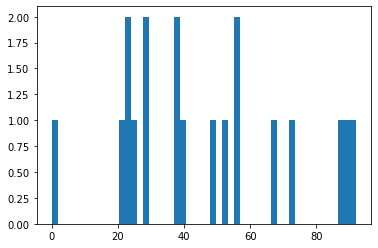

In [11]:
# find the distribution of length of sentences
import matplotlib.pyplot as plt
plt.hist([len(s) for s in clean_sentences], bins=50)
plt.show()

In [12]:
sent_length=60 # for embedding, all statemets must be of same length
# padding to get equallength of sentences to fit in the model
embedded_clean_sentence=pad_sequences(onehot_rep,maxlen=sent_length,padding="post") 
print(embedded_clean_sentence)

[[1617 4385 7875 ...    0    0    0]
 [6604 2501 8228 ...    0    0    0]
 [4583 1941 2420 ...    0    0    0]
 ...
 [1757 1627 7433 ...    0    0    0]
 [3849 1249  961 ...    0    0    0]
 [6375 2363 1617 ...    0    0    0]]


In [13]:
# lets now set the number of dimensions that we are gonna take as output
dim_out=10

In [14]:
# creating the model
model=Sequential()
model.add(Embedding(vocab_size,dim_out,input_length=sent_length))
model.compile('adam','mse')
model.summary()
          

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 10)            100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.predict(embedded_clean_sentence)

array([[[-0.01182208,  0.01107337, -0.01394707, ..., -0.0024423 ,
         -0.0287302 , -0.02687112],
        [ 0.0418921 ,  0.03185011,  0.04923402, ...,  0.03340634,
         -0.0279219 , -0.02354417],
        [-0.04733866,  0.02672868,  0.04105821, ...,  0.02724813,
          0.03780993,  0.01270619],
        ...,
        [ 0.01447824,  0.0061031 ,  0.04184644, ..., -0.01457683,
         -0.029953  ,  0.01560488],
        [ 0.01447824,  0.0061031 ,  0.04184644, ..., -0.01457683,
         -0.029953  ,  0.01560488],
        [ 0.01447824,  0.0061031 ,  0.04184644, ..., -0.01457683,
         -0.029953  ,  0.01560488]],

       [[-0.01705927,  0.04244744,  0.04426548, ...,  0.00049045,
          0.04650687, -0.03222193],
        [-0.0259847 , -0.01594853, -0.04793731, ..., -0.01113355,
         -0.028025  ,  0.03363195],
        [-0.01744277, -0.03681965,  0.00333387, ...,  0.006057  ,
         -0.00620941, -0.0387942 ],
        ...,
        [ 0.01447824,  0.0061031 ,  0.04184644, ..., -

In [16]:
clean_sentences[1]

'russian player problems openly speaking recent interview said really hide feelings much'

In [17]:
embedded_clean_sentence[1]

array([6604, 2501, 8228, 8569, 9991,  214, 6786, 8113, 3729, 1653,  395,
       6654,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [18]:
arary_1=model.predict(embedded_clean_sentence)

In [19]:
weight=np.sum(arary_1[0])
weight

5.0602455

In [20]:
weight_list=[]
sentence_list=[]
for i in range(0,len(arary_1)):
    weight_list.append(np.sum(arary_1[i]))
    sentence_list.append(clean_sentences[i])

In [21]:
weight_list

[5.0602455,
 4.629329,
 5.722543,
 4.3497066,
 4.655042,
 5.493836,
 5.353803,
 5.0084167,
 5.5031457,
 5.1911516,
 5.169204,
 5.9308896,
 4.5138946,
 5.37226,
 4.777948,
 4.9775953,
 5.080586,
 5.750369,
 5.486116]

In [22]:
sentence_list

['maria sharapova basically friends tennis players wta tour',
 'russian player problems openly speaking recent interview said really hide feelings much',
 'think everyone knows job',
 'courts court playing competitor want beat every single person whether locker room across net',
 'one strike conversation weather know next minutes go try win tennis match',
 'pretty competitive girl',
 'say hellos sending players flowers well',
 'uhm really friendly close many players',
 'lot friends away courts',
 'said really close lot players something strategic',
 'different men tour women tour',
 '',
 'think sport mean friends everyone categorized tennis player going get along tennis players',
 'think every person different interests',
 'friends completely different jobs interests met different parts life',
 'think everyone thinks tennis players greatest friends',
 'ultimately tennis small part',
 'many things interested',
 'also read maria sharapova reveals tennis keeps motivated']

In [23]:
df=pd.DataFrame()
df['sentence']=sentence_list
df['weight']=weight_list

In [30]:
df=df.sort_values(by='weight',ascending=False)
df

,sentence,weight
11,,5.930890
17,many things interested,5.750369
2,think everyone knows job,5.722543
8,lot friends away courts,5.503146
5,pretty competitive girl,5.493836
18,also read maria sharapova reveals tennis keeps...,5.486116
13,think every person different interests,5.372260
6,say hellos sending players flowers well,5.353803
9,said really close lot players something strategic,5.191152
10,different men tour women tour,5.169204


In [29]:
df['sentence'][0]

'maria sharapova basically friends tennis players wta tour'

In [35]:
vocab_size=10000
dim_out=10
sent_length=100
model=Sequential()
model.add(Embedding(vocab_size,dim_out,input_length=sent_length))
model.compile('adam','mse')

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

def text_summarization(text):
    sentences = []
    sentences.append(sent_tokenize(text))
    sentences = [y for x in sentences for y in x] # flatten list
    clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
    clean_sentences = [s.lower() for s in clean_sentences]
    clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

    vocab_size=10000
    onehot_rep=[one_hot(words,vocab_size) for words in clean_sentences]
    sent_length=100
    # padding to get equallength of sentences to fit in the model
    embedded_clean_sentence=pad_sequences(onehot_rep,maxlen=sent_length,padding="post") 
    arary_1=model.predict(embedded_clean_sentence)
    weight_list=[]
    sentence_list=[]
    for i in range(0,len(arary_1)):
        weight_list.append(np.sum(arary_1[i]))
        sentence_list.append(clean_sentences[i])
    df=pd.DataFrame()
    df['sentence']=sentence_list
    df['weight']=weight_list 
    
    df.sort_values(by='weight',ascending=False)
 
    return df['sentence'][0]

In [36]:
# Read the Data
df_texts = pd.read_csv("tennis_articles.csv", encoding='cp1252')
df_texts.head()

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP) — Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [37]:
df_texts['summary']=df_texts['article_text'].apply(text_summarization)
df_final=df_texts[['article_text','summary']]
df_final

,article_text,summary
0,Maria Sharapova has basically no friends as te...,maria sharapova basically friends tennis playe...
1,"BASEL, Switzerland (AP) — Roger Federer advanc...",basel switzerland ap roger federer advanced th...
2,Roger Federer has revealed that organisers of ...,roger federer revealed organisers launched con...
3,Kei Nishikori will try to end his long losing ...,kei nishikori try end long losing streak atp f...
4,"Federer, 37, first broke through on tour over ...",federer first broke tour two decades ago since...
5,Nadal has not played tennis since he was force...,nadal played tennis since forced retire us ope...
6,"Tennis giveth, and tennis taketh away. The end...",tennis giveth tennis taketh away
7,I PLAYED golf last week with Todd Reid. He pic...,played golf last week todd reid


In [38]:
# so if we want to get the summary of the articles combined
'. '.join(df_final['summary'].to_list())

'maria sharapova basically friends tennis players wta tour. basel switzerland ap roger federer advanced th swiss indoors final career beating seventh seeded daniil medvedev saturday. roger federer revealed organisers launched condensed davis cup gave three days decide would commit controversial competition. kei nishikori try end long losing streak atp finals kevin anderson go second title year erste bank open sunday. federer first broke tour two decades ago since gone enjoy glittering career. nadal played tennis since forced retire us open semi finals juan martin del porto knee injury. tennis giveth tennis taketh away. played golf last week todd reid'

In [ ]:
# So here we get summary of all the Articles put together